<a href="https://colab.research.google.com/github/mleyvaz/Neural-networks/blob/main/Metodolog%C3%ADa_de_la_Investigaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fase 1: Exploracion de datos 

*   Calular medias de tendencia central
*   Calcular medidas de dispersión
*   Graficar





In [ ]:
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
dataset3

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.groupby("class")['petal-length'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


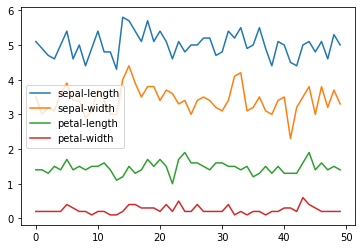

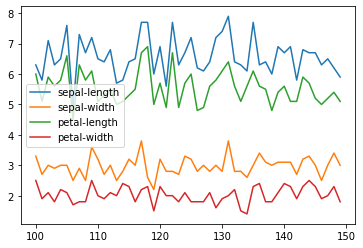

In [ ]:
# Dividir en 2 dataset
setosa = dataset[(dataset['class'] == 'Iris-setosa')]
virginica = dataset[(dataset['class'] == 'Iris-virginica')]
setosa.plot()
versicolor.plot()
plt.show()


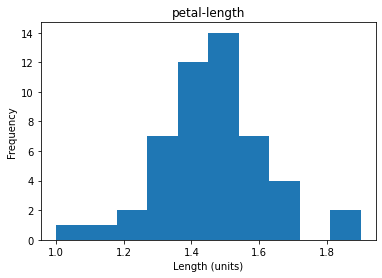

In [ ]:
setosa['petal-length'].plot(kind="hist", title="petal-length")
plt.xlabel("Length (units)")
plt.savefig('Setosa_petal-length')


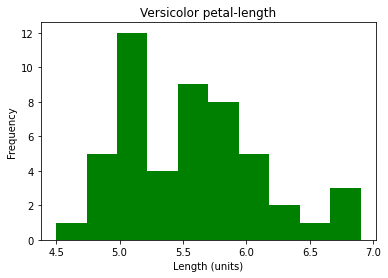

In [ ]:
virginica['petal-length'].plot(kind="hist", title= "Versicolor petal-length", color="green")
plt.xlabel("Length (units)")
plt.savefig('Versicolor_petal-length')

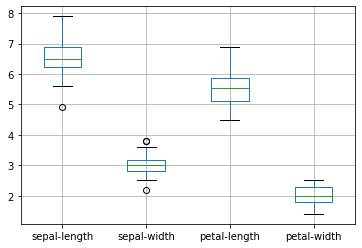

In [ ]:
boxplot = virginica.boxplot(column=['sepal-length',	'sepal-width',	'petal-length',	'petal-width'])

# Prueba de hipótesis

Prueba de hipótesis en python

|       |  | Pruebas Paramétricas     | Pruebas No Paramétricas  |
| ----------- | ----------- | ----------- | ----------- |
| Muestras Independientes     | Múltiples muestras | Anova     |  Kruskal-Wallis|
|       | Dos Muestras| t de Student      | U Mann Whitney |
| Muestras Dependientes      | Múltiples muestras | ANOVA de dos vías      | Friedman |
|      | Dos Muestras | Prueba t dependiente      | Wilcoxson |



https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/



*   Pruevas parametricas: Distibucion normal
*   Muestras dependinetes : Esta prueba se utiliza cuando las muestras son dependientes; esto es, cuando se trata de una única muestra que ha sido evaluada dos veces (muestras repetidas) o cuando las dos muestras han sido emparejadas o apareadas.






*   H0: La muestra sigue una distribución normal
*  H1:  La muestra no sigue una distribución normal



In [ ]:
from scipy import stats

Test de normalidad visual

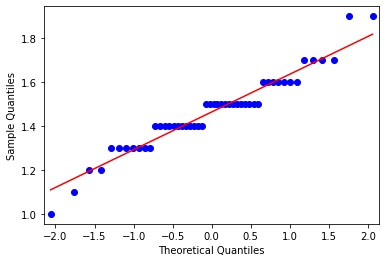

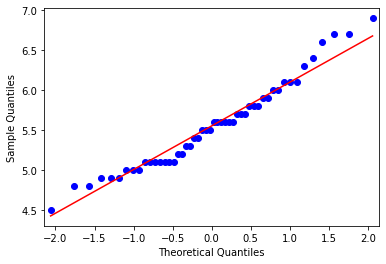

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(setosa['petal-length'], line='s')
from statsmodels.graphics.gofplots import qqplot
qqplot(virginica['petal-length'], line='s')
plt.show()

In [ ]:
stat, p = stats.shapiro(setosa['petal-length'])
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra no sigue una distribución normal')

0.05464918911457062
0 La muestra sigue una distribución normal


In [ ]:
stat, p = stats.shapiro(virginica['petal-length'])
# interpret
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra sigue una distribución normal')

stat=0.962, p=0.110
0 La muestra sigue una distribución normal


Pruebas paramétricas dos muestras independientes

In [ ]:
H0: La media de las muestras son iguales
H1: La media de las muestras no son iguales

In [ ]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
stat, p = stats.ttest_ind(setosa['petal-length'], virginica['petal-length'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('La media de las muestras son iguales')
else:
	print('La media de las muestras no son iguales')

stat=-49.966, p=0.000
La media de las muestras no son iguales


Preexperimento 

In [ ]:
url = "https://raw.githubusercontent.com/mleyvaz/Neural-networks/main/preexperimento.csv"
names = ['tiempo','actual', 're1', 're2', 're3', 're4', 're5']
dataset2 = pd.read_csv(url, names=names, skiprows=[0])
dataset2.head()

,tiempo,actual,re1,re2,re3,re4,re5
0,0H(S) 0MIN(S),0.25,0.00030,0.00031,0.00007,0.00008,0.00007
1,0H(S) 10MIN(S),1.00,0.00025,0.00022,0.00009,0.00009,0.00009
2,0H(S) 20MIN(S),2.10,0.00032,0.00026,0.00009,0.00010,0.00009
3,0H(S) 30MIN(S),2.80,0.00018,0.00026,0.00009,0.00009,0.00009
4,0H(S) 40MIN(S),3.50,0.00035,0.00025,0.00009,0.00010,0.00009


In [ ]:
dataset3=dataset2[['actual', 're1', 're2', 're3', 're4', 're5']]
dataset3.describe()
import seaborn as sns

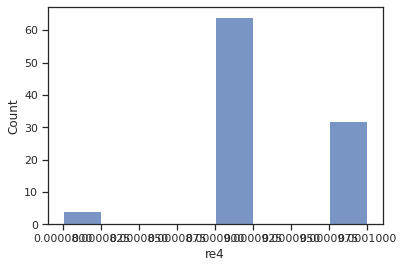

In [ ]:
sns.histplot(data = dataset3, x = 're4')

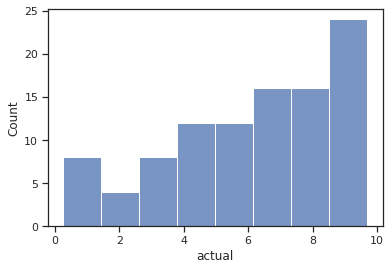

In [ ]:
sns.histplot(data = dataset3, x = 'actual')

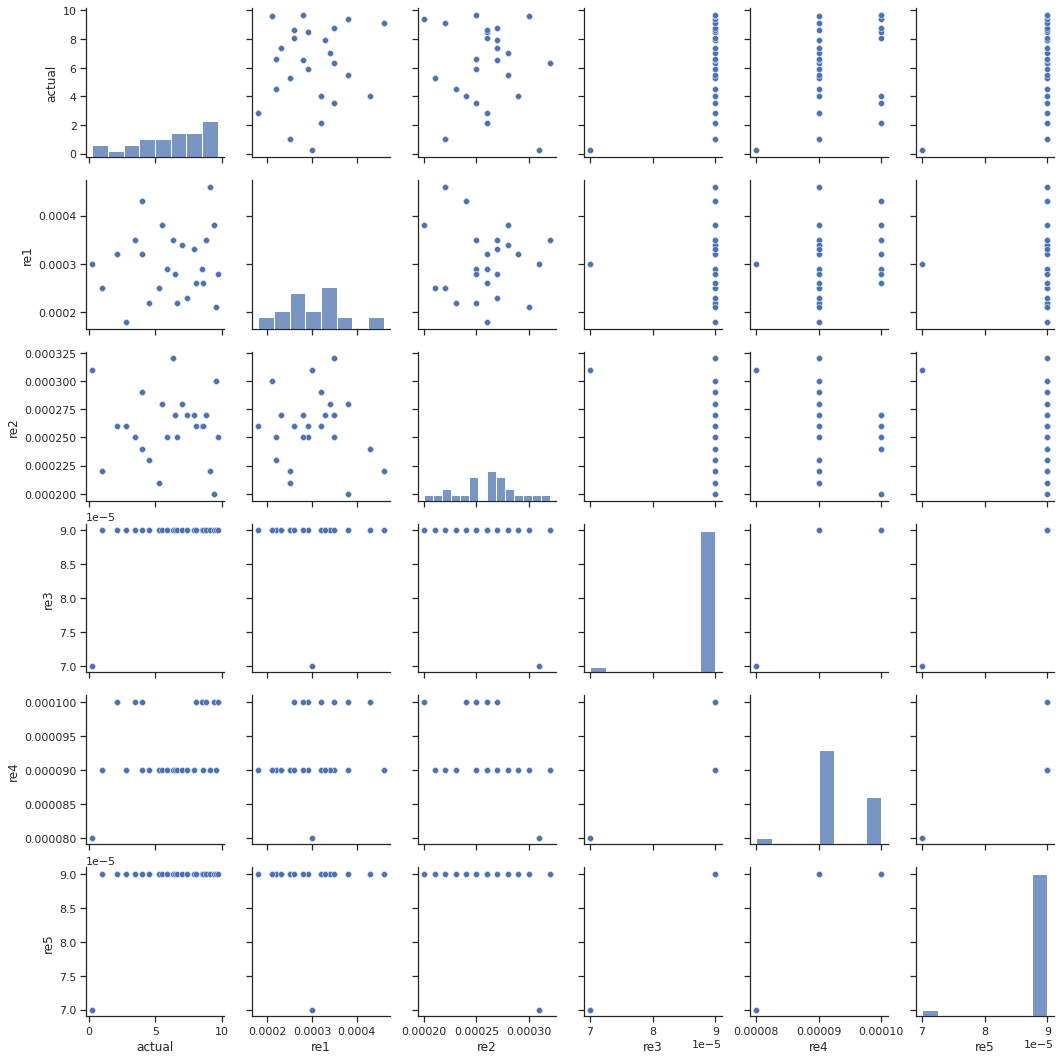

In [ ]:
sns.pairplot(dataset3)

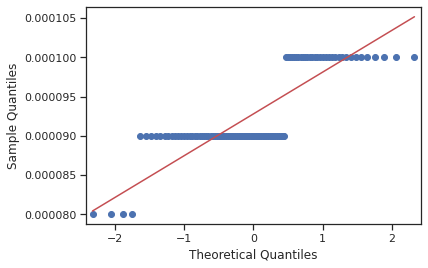

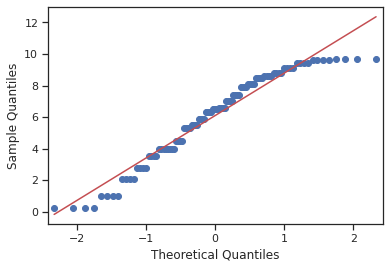

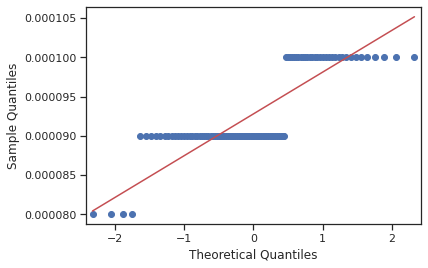

In [ ]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.gofplots import qqplot
qqplot(dataset3['actual'], line='s')
qqplot(dataset3['re4'], line='s')

In [ ]:
stat, p = stats.shapiro(dataset3['actual'])
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra no sigue una distribución normal')

0.0001239403209183365
H1  La muestra no sigue una distribución normal




*   H0: La media de las muestras son iguales
*   H1: La media de las muestras no son iguales




In [ ]:
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(dataset3['actual'], dataset3['re1'], dataset3['re2'], dataset3['re3'],  dataset3['re4'], dataset3['re5'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('La media de las muestras son iguales')
else:
	print(' La media de las muestras no son iguales')

stat=477.850, p=0.000
 La media de las muestras no son iguales


# Conclusiones
Deben corresponderse con lo expuesto en los capítulos de la tesis, en función de su objetivo, hipótesis y tareas de la investigación. Constituyen  juicios críticos o una síntesis teórica generalizada que refleja los aportes principales de la investigación. En ningún momento podrán redactarse como resúmenes o breves recuentos (se hizo esto, se hizo lo otro, etc.)
Deben expresar claramente el cumplimiento de los objetivos y la validación a través de las variables dependientes e independientes identificadas.


# Recomendaciones. 
Se derivan de lo investigado, básicamente se ven como consecuencia de las conclusiones parciales . Constituyen lo que el investigador propone a la ciencia o a la práctica para continuar con su investigación. Puede señalarse explícitamente en alguna recomendación aquellos aspectos que podrían investigarse en otros trabajos.

# Referencias bibliográficas 
La bibliografía debe ser la actualizada, representativa nacional e internacional, de fuentes de reconocida calidad; así como escritas y referenciadas utilizando alguna de las normas internacionalmente reconocidas. 
Más del 40% de la misma sea de los últimos tres años.

Debe haber referencias a tesis de doctorado, tesis de maestría, artículos, preprints, conferencias en eventos y fuentes digitales.

Todas las bibliografías deberán contar con el autor y la fecha de se creación y se ajustarán a las normas.
Se deberán usar herramientas para el control de las bibliotecas personales pero se exigirá que el uso de los mismos genere adecuadamente las referencias bibliográficas.  En todas deben quedar reflejados el año, la editorial, el autor, etc.






# Anexos

Se hará un análisis minucioso de aquellos anexos que sean realmente indispensables (mínima cantidad).  Cuando sea necesario, se podrá incluir como anexo un glosario de términos con aquellos términos muy especializados de algún campo de aplicación, o términos muy novedosos de la informática que hayan sido poco difundidos.
Los anexos pueden ser incluidos de manera digital en la tesis adjuntando a la misma un soporte memoria externa.


# Validacion en Machine Learning


Procedimiento de prueba de hipótesis estadísticas 5x2 para comparar dos algoritmos de aprendizaje automático
l procedimiento general es el siguiente:

*   Divida aleatoriamente todo su conjunto de datos en k "pliegues"
*   Para cada k-pliegue en su conjunto de datos, construya su modelo en k - 1 

*   pliegue del conjunto de datos. Luego, pruebe el modelo para verificar la efectividad del kth veces   Elemento de la lista
* Registre el error que ve en cada una de las predicciones
* Repita esto hasta que cada uno de los pliegues k haya servido como conjunto de prueba
* El promedio de los k errores registrados se denomina error de validación cruzada y servirá como métrica de rendimiento para el modelo.





5×2 Cross-Validation

In [ ]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.evaluate import paired_ttest_5x2cv
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# Evaluar modelo 1
model1 = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('LogisticRegression Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))
# evaluate model 2
model2 = LinearDiscriminantAnalysis()
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('LinearDiscriminantAnalysis Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# Comprobar si las diferencias son significativas 
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)
# Resumen
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

LogisticRegression Mean Accuracy: 0.892 (0.036)
LinearDiscriminantAnalysis Mean Accuracy: 0.893 (0.033)
P-value: 0.328, t-Statistic: 1.085
Algorithms probably have the same performance


Comprara mediante el test 5×2 Cross-Validation


*   Redes neuronales : from sklearn.neural_network import MLPClassifier
*   con el Gaussian Naive : from sklearn.naive_bayes import GaussianNB



